In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi']= 300
import seaborn as sns
sns.set_theme(style='darkgrid',palette='rainbow')
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Wine.csv')
df

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  Customer_Segment  
0     3.92     1065                 1  
1     3.40     1050                 1  
2     3.17     1185                 1  
3     3.45     1480                 1  
4     2.93      735                 1  
..     ...      ...               ...  
173   1.74      740                 3  
174   1.56      750                 3  
175   1.56      835                 3  
176   1.62      840                 3  
177   1.60      560                 3  

[178 rows x 14 columns]

In [3]:
sns.pairplot(df)

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Proline'>

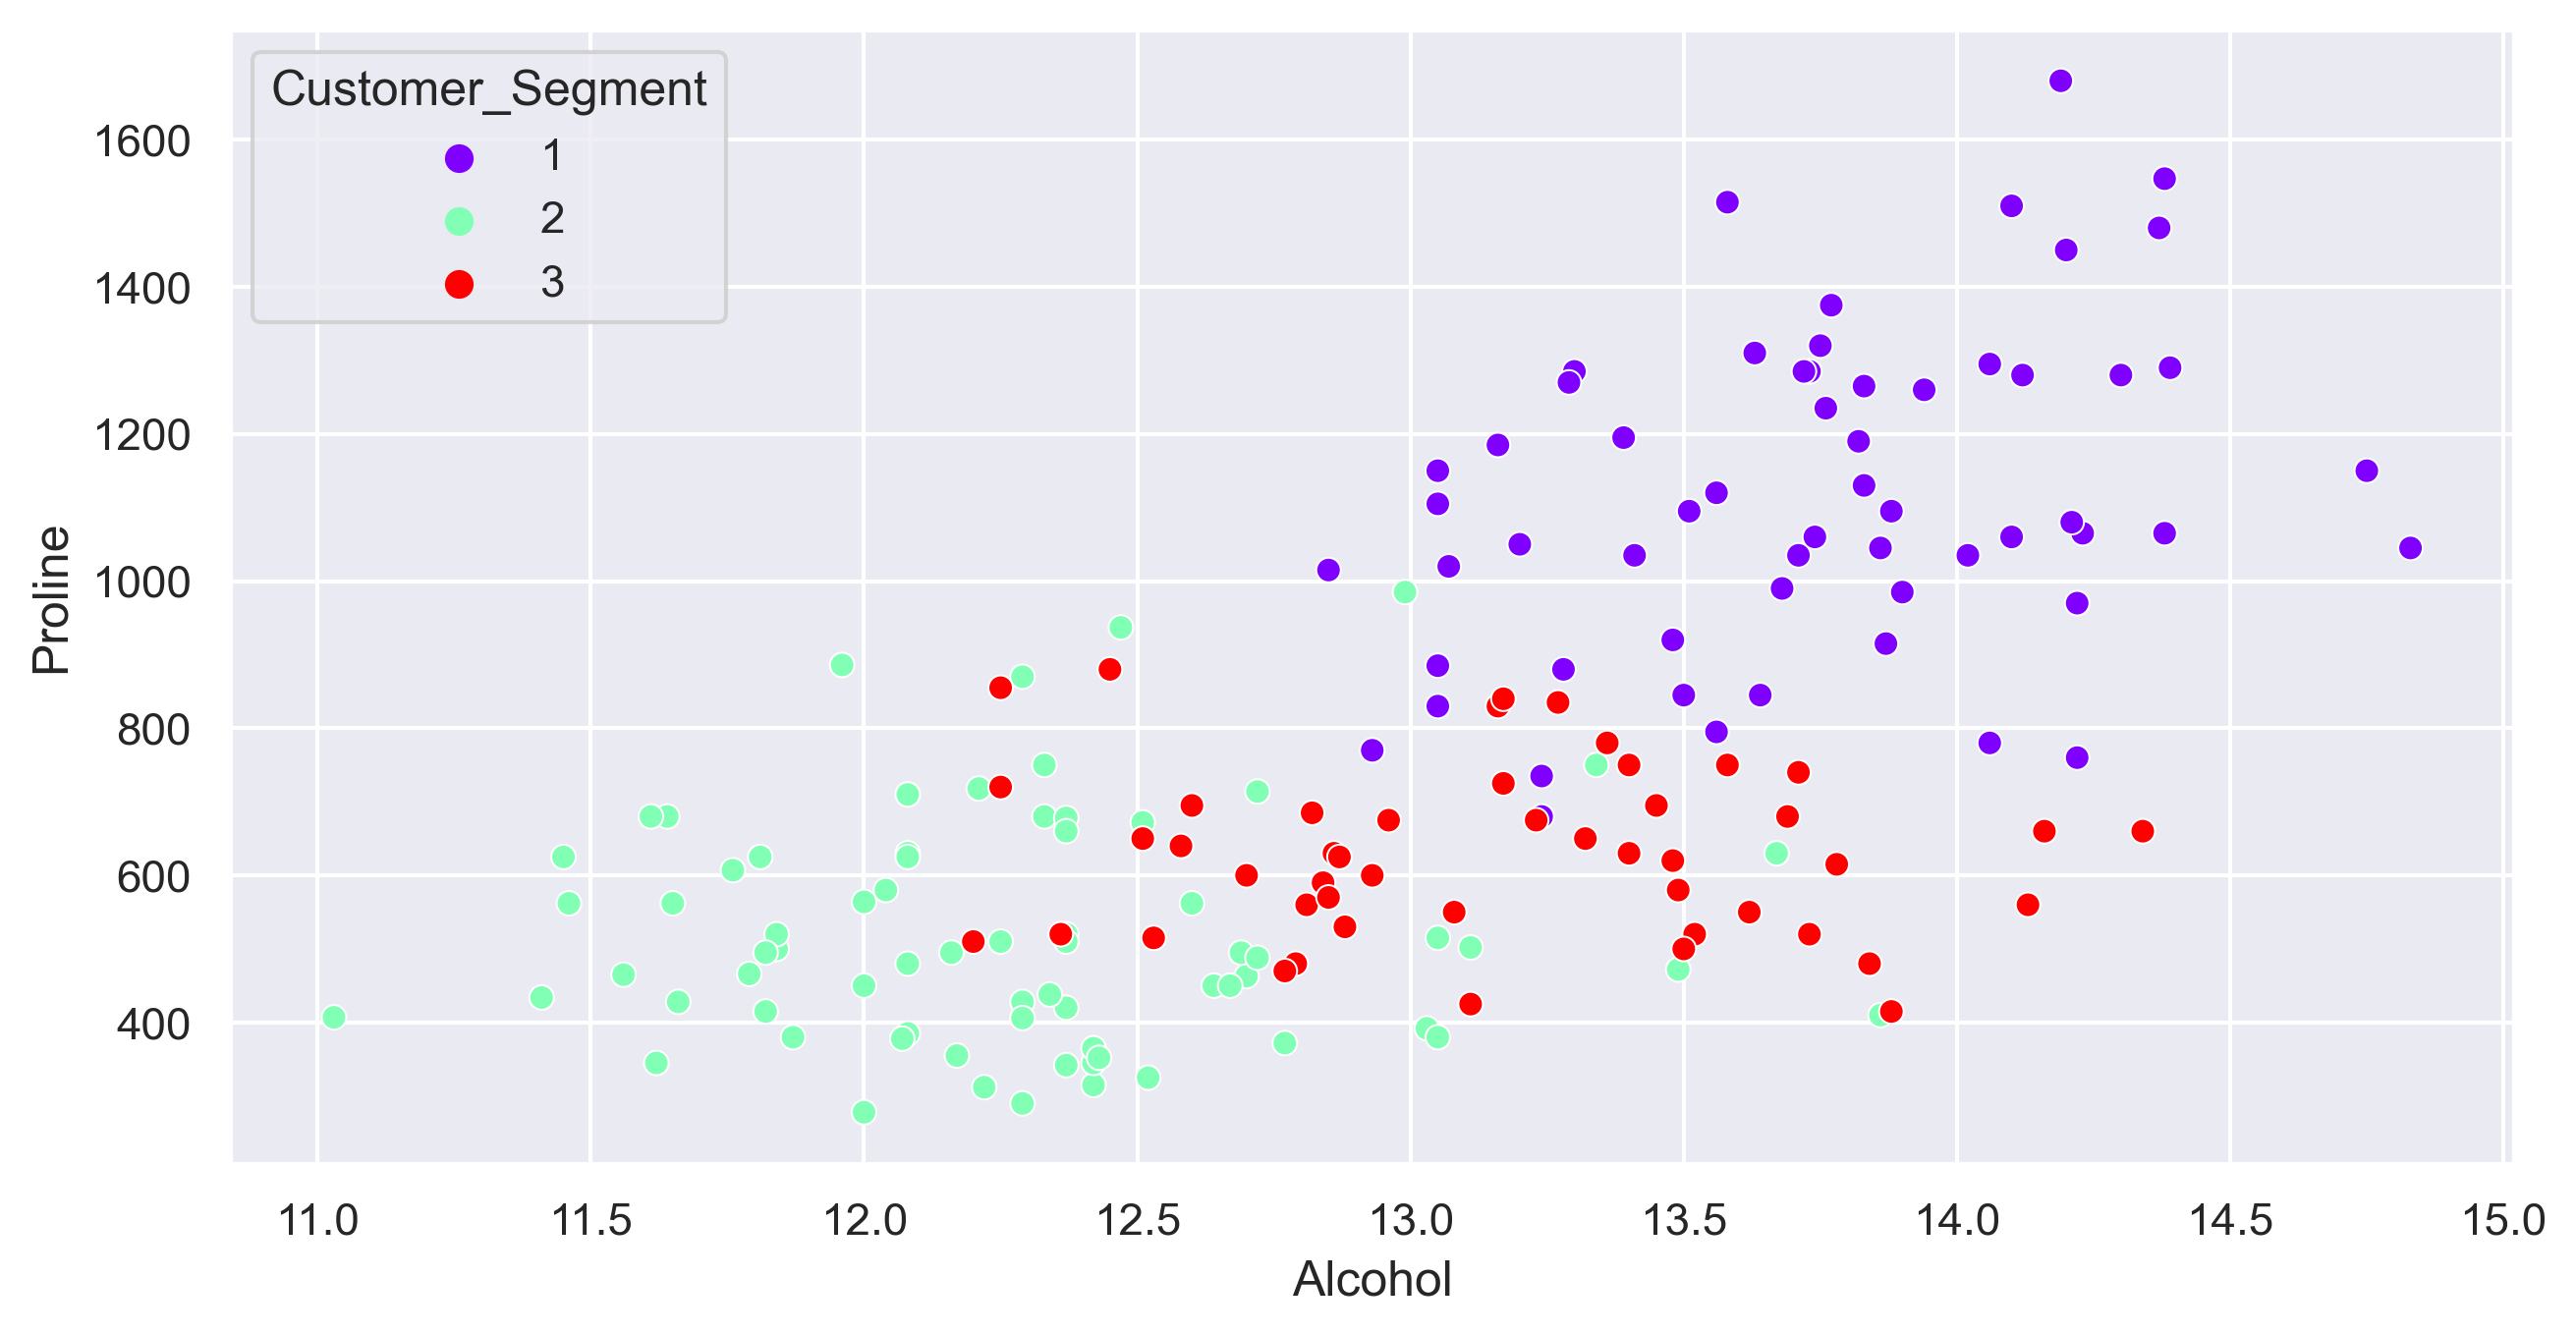

In [6]:
sns.scatterplot(df['Alcohol'],df['Proline'], hue = df['Customer_Segment'],
               palette='rainbow')

In [7]:
x = df.iloc[:,:-1]
y = df['Customer_Segment']

In [8]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [9]:
svm = SVC()

svm.fit(xtrain,ytrain)
ypred = svm.predict(xtest)

In [10]:
from sklearn.metrics import classification_report

In [11]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.92      0.79      0.85        14
           2       0.58      0.85      0.69        13
           3       0.20      0.11      0.14         9

    accuracy                           0.64        36
   macro avg       0.57      0.58      0.56        36
weighted avg       0.62      0.64      0.61        36



In [12]:
svm.score(xtrain,ytrain),svm.score(xtest,ytest)

(0.7253521126760564, 0.6388888888888888)

In [13]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [28]:
svm = SVC()

svm.fit(xtrain,ytrain)
ypred = svm.predict(xtest)

In [29]:
svm.score(xtrain,ytrain),svm.score(xtest,ytest)

(1.0, 0.9722222222222222)

# Hyperparameter tuning

In [19]:
params = {
    'kernel' : ['poly','rbf','linear','sigmoid'],
    'C' : [0.1,0.001,0.0001,1,10],
    'gamma' : [0.1,0.001,1,10]
}

In [22]:
grid = GridSearchCV(SVC(), param_grid=params, verbose=1)

In [23]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.001, 0.0001, 1, 10],
                         'gamma': [0.1, 0.001, 1, 10],
                         'kernel': ['poly', 'rbf', 'linear', 'sigmoid']},
             verbose=1)

In [24]:
grid.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [25]:
svm = SVC(kernel='rbf',C = 10, gamma=0.001)

In [26]:
svm.fit(xtrain,ytrain)
ypred = svm.predict(xtest)

In [27]:
svm.score(xtrain,ytrain), svm.score(xtest,ytest)

(0.9929577464788732, 1.0)